## Implement of the transport map of sheaf over manifold

Here we compute the transport map $\mathbf{O}_{ij}:= \mathscr{F}^T_{v \unlhd e}\mathscr{F}_{u \unlhd e}$ according to  https://arxiv.org/pdf/2206.08702.pdf and https://arxiv.org/pdf/1102.0075.pdf

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

from sklearn import datasets, manifold

n_samples = 5000

sr_points, sr_color = datasets.make_swiss_roll(n_samples, random_state=0)

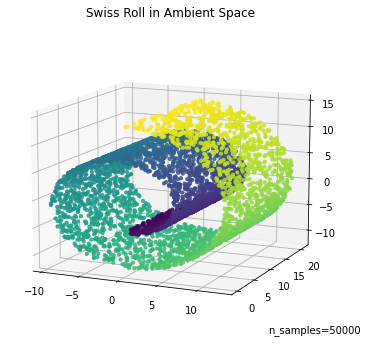

In [3]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=10, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=50000", transform=ax.transAxes)

In [4]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Generate a random point cloud for demonstration
np.random.seed(1)
point_cloud = sr_points  # 1500 points with 3 extrinsic dimensions

# Choose the point for which you want to find k nearest neighbors
query_point = np.array([sr_points[101]])

# Number of neighbors to find
k = 5

# Create a NearestNeighbors model
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(point_cloud)

# Find k nearest neighbors
distances, indices = nbrs.kneighbors(query_point)

print(f"Query Point: {query_point}")
print(f"{k} Nearest Neighbors:")
for i in range(k):
    neighbor_index = indices[0][i]
    neighbor_distance = distances[0][i]
    print(f"Neighbor {i+1}: Index = {neighbor_index}, Distance = {neighbor_distance:.4f}, Point = {point_cloud[neighbor_index]}")

Query Point: [[4.07867468 7.9827285  6.00255775]]
5 Nearest Neighbors:
Neighbor 1: Index = 101, Distance = 0.0000, Point = [4.07867468 7.9827285  6.00255775]
Neighbor 2: Index = 4806, Distance = 0.1574, Point = [3.98691245 8.08148696 6.08389437]
Neighbor 3: Index = 2973, Distance = 0.2653, Point = [4.19645375 8.19419395 5.8939496 ]
Neighbor 4: Index = 2388, Distance = 0.4080, Point = [4.37136201 7.92996853 5.72327687]
Neighbor 5: Index = 3777, Distance = 0.4291, Point = [3.76709889 8.11182475 6.26787225]


In [5]:
#parameters 

n_samples = 5000
d = 2
epsilon = np.sqrt(n_samples ** ( - 2 / (d + 1)))
epsilon

0.05848035476425733

In [6]:
x_i = point_cloud[indices[0]] - query_point

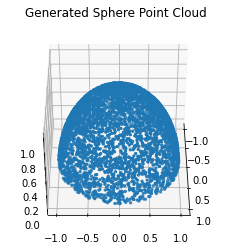

In [7]:
def generate_sphere_point_cloud(num_points, radius=1):
    phi = np.random.uniform(0, 2 * np.pi, num_points)
    theta = np.arccos(np.random.uniform(0, 1, num_points))

    x = radius * np.sin(theta) * np.cos(phi)
    y = radius * np.sin(theta) * np.sin(phi)
    z = radius * np.cos(theta)

    return np.column_stack((x, y, z))

# Generate a sphere point cloud with 1000 points and radius 1
sphere_cloud = generate_sphere_point_cloud(5000, radius=1)

# Visualize the point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sphere_cloud[:, 0], sphere_cloud[:, 1], sphere_cloud[:, 2], s=5)
ax.set_title("Generated Sphere Point Cloud")
ax.view_init(40, 0)
plt.show()

In [8]:
np.random.seed(0)
point_cloud = sphere_cloud  # 1500 points with 3 extrinsic dimensions

# Choose the point for which you want to find k nearest neighbors
query_point_i = np.array([point_cloud[101]])

# Number of neighbors to find
k = 250

# Create a NearestNeighbors model
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(point_cloud)

# Find k nearest neighbors
distances, indices = nbrs.kneighbors(query_point_i)

print(f"Query Point: {query_point_i}")

Query Point: [[-0.56361817 -0.09675533  0.8203493 ]]


In [9]:
point_cloud[101:103]
dist, ind = nbrs.kneighbors(point_cloud[101:103])

In [10]:
distances

array([[0.        , 0.00750634, 0.01989812, 0.02600859, 0.03216611,
        0.03791259, 0.03825343, 0.0411283 , 0.04296355, 0.044898  ,
        0.04622511, 0.04752081, 0.04769718, 0.0613026 , 0.06137679,
        0.06158743, 0.06397441, 0.06722846, 0.06747597, 0.07276405,
        0.07310729, 0.07722871, 0.07755856, 0.07891794, 0.08003622,
        0.08215165, 0.08329789, 0.08394645, 0.08679517, 0.08694784,
        0.08843363, 0.08855942, 0.09146011, 0.09217565, 0.09251072,
        0.09257199, 0.09416756, 0.09434239, 0.09463663, 0.10006339,
        0.10112748, 0.10294926, 0.10385614, 0.10903678, 0.10926768,
        0.109346  , 0.11154258, 0.1138544 , 0.1143342 , 0.11434302,
        0.11648854, 0.11688204, 0.12011972, 0.126323  , 0.1265344 ,
        0.12827811, 0.12954541, 0.1313772 , 0.13336234, 0.13479969,
        0.136085  , 0.13612922, 0.13832484, 0.14022934, 0.14130434,
        0.14135557, 0.1417922 , 0.14376033, 0.14418902, 0.14636236,
        0.14656818, 0.14659609, 0.14913961, 0.15

In [11]:
d = 2
epsilon = 0.1
epsilon_sqrt = np.sqrt(epsilon)
epsilon_sqrt

0.31622776601683794

In [12]:
def filter_vector_between(v, a, b):
    
    filtered_vector = [x for x in v if a < x < b]
    filtered_vector = np.array(filtered_vector)
    return filtered_vector

def vector_index_upto(v, k):
    result_vector = np.array([v[i] for i in range(k)])
    return result_vector

def vector_of_index(v, index):
    result_vector = np.array([v[i] for i in index])
    return result_vector 

b = filter_vector_between(distances[0], 0, epsilon_sqrt).shape[0]
epsilon_neighborhood = vector_of_index(point_cloud, vector_index_upto(indices[0], b + 1))[1: ]


In [13]:
Xi = epsilon_neighborhood - query_point_i
D_i = np.diag(np.sqrt(np.exp(- (vector_index_upto(distances[0], b + 1)[1:]) ** 2 / epsilon)))
B_i = Xi.T @ D_i
U, S, V = np.linalg.svd(B_i, full_matrices = False)
O_i = U[:2, :]

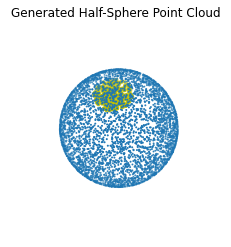

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sphere_cloud[:, 0], sphere_cloud[:, 1], sphere_cloud[:, 2], s=1)
ax.scatter(query_point_i[:, 0], query_point_i[:, 1], query_point_i[:, 2], c = "r", s = 20)
ax.scatter(epsilon_neighborhood[:, 0], epsilon_neighborhood[:, 1], epsilon_neighborhood[:, 2], c = "y", s = 10)
ax.set_title("Generated Half-Sphere Point Cloud")
ax.view_init(90, 0)
plt.axis('off')
plt.show()

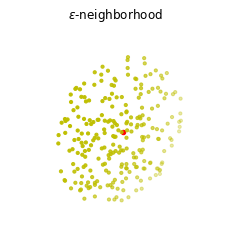

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(query_point_i[:, 0], query_point_i[:, 1], query_point_i[:, 2], c = "r", s = 20)
ax.scatter(epsilon_neighborhood[:, 0], epsilon_neighborhood[:, 1], epsilon_neighborhood[:, 2], c = "y", s = 10)
ax.set_title("$\epsilon$-neighborhood")
ax.view_init(130, 40)
plt.axis('off')
plt.show()

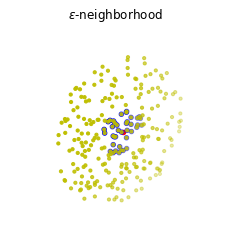

In [16]:
radius = 0.3 * epsilon_sqrt
num_vectors = filter_vector_between(distances[0], 0, radius).shape[0]
radius_neighborhood = vector_of_index(point_cloud, vector_index_upto(indices[0], num_vectors + 1))[1: ]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(query_point_i[:, 0], query_point_i[:, 1], query_point_i[:, 2], c = "r", s = 20)
ax.scatter(radius_neighborhood[:, 0], radius_neighborhood[:, 1], radius_neighborhood[:, 2], c = "b", s = 20)
ax.scatter(epsilon_neighborhood[:, 0], epsilon_neighborhood[:, 1], epsilon_neighborhood[:, 2], c = "y", s = 10)

ax.set_title("$\epsilon$-neighborhood")
ax.view_init(130, 40)
plt.axis('off')
plt.show()

In [111]:
def sub_vectors_between(set_vectors, a, b):
    # this function selects a set of vectors whose entries are between a and b
    
    filtered_vector = [[x for x in v if a < x < b] for v in set_vectors ]
    return filtered_vector        

def list_vector_indices_upto(list_indices, list_of_nums):
    result_list = [[list_indices[i][j] for j in range(list_of_nums[i] + 1)] for i in range(len(list_indices))]
    return result_list

def list_vector_of_index(set_vectors, list_indices):
    
    list_result_vectors = [np.array([set_vectors[i] for i in list_indices[j]]) for j in range(len(list_indices))]
    return list_result_vectors 



def find_basis(point_cloud, x, epsilon_PCA = 0.1, dim = 2, tau_ratio = 0.3):
    #point_cloud: the manifold 
    #x: np.array of shape 1 by p, the point where the curvature is evaluated at, e.g., [[1, 2, 3]]
    #epsilon: the radius of local PCA
    #dim: the dimension of the manifold
    #tau_ratio: the ratio is tau radius (where we evaluate the curvature)/ epsilon_sqrt
    epsilon_sqrt = np.sqrt(epsilon_PCA)
    tau = tau_ratio * epsilon_sqrt

    # Number of neighbors to find, we take 5% of the total population
    k = int(0.05 * point_cloud.shape[0])
    
    # Create a NearestNeighbors model
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(point_cloud)

    # Find k nearest neighbors
    dist_i, indx_i = nbrs.kneighbors(x)
    # Find epsilon neighborhood
    dist_epsilon = sub_vectors_between(dist_i, 0, epsilon_sqrt)
    len_dist_epsilon = [len(v) for v in dist_epsilon]
    epsilon_neighborhood = list_vector_of_index(point_cloud, list_vector_indices_upto(indx_i, len_dist_epsilon))[0]
    # Find tau neighborhood
    dist_tau = sub_vectors_between(dist_i, 0, tau)
    len_dist_tau = [len(v) for v in dist_tau]
    tau_neighborhood = list_vector_of_index(point_cloud, list_vector_indices_upto(indx_i, len_dist_tau))[0]
    num = len(tau_neighborhood)
    
    distances, indices = nbrs.kneighbors(tau_neighborhood)
    
    distances_epsilon = sub_vectors_between(distances, 0, epsilon_sqrt) # this is the list of distances in the epsilon
    list_len_dist_epsilon = [len(v) for v in distances_epsilon] #this gives the list of lengths in the distance_epsilon 
    
    tau_epsilon_neighborhood = list_vector_of_index(point_cloud, list_vector_indices_upto(indices, list_len_dist_epsilon))
    list_X_i = [tau_epsilon_neighborhood[i][1:] - tau_neighborhood[i] for i in range(num)]
    
    
    list_D_i = [np.diag(np.sqrt(np.exp(- np.array(distances_epsilon[i]) ** 2 / epsilon))) for 
                i in range(num)]
    list_B_i = [list_X_i[j].T @ list_D_i[j] for j in range(num)]
    O = []
    for q in range(num):
        U, S, V = np.linalg.svd(list_B_i[q], full_matrices = False)
        O_i = U[:dim, :]
        O.append(O_i)
        
    return epsilon_neighborhood, tau_neighborhood, tau_epsilon_neighborhood, O

    



In [112]:
ep_neighbor, tau_neighbor, tau_epsilon_neighbor, O = find_basis(point_cloud, query_point_i)
query_points = tau_neighbor

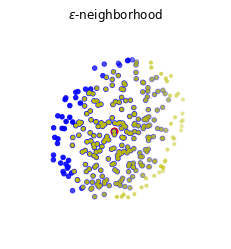

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tau_neighbor[38, 0], tau_neighbor[38, 1], tau_neighbor[38, 2], c = "r", s = 50)
ax.scatter(tau_epsilon_neighbor[38][:, 0], tau_epsilon_neighbor[38][:, 1], tau_epsilon_neighbor[38][:, 2], c = "b", s = 20)
ax.scatter(ep_neighbor[:, 0], ep_neighbor[:, 1], ep_neighbor[:, 2], c = "y", s = 10)

ax.set_title("$\epsilon$-neighborhood")
ax.view_init(130, 40)
plt.axis('off')
plt.show()

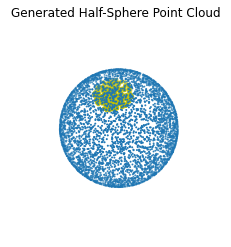

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sphere_cloud[:, 0], sphere_cloud[:, 1], sphere_cloud[:, 2], s=1)
ax.scatter(query_point_i[:, 0], query_point_i[:, 1], query_point_i[:, 2], c = "r", s = 20)
ax.scatter(ep_neighbor[:, 0], ep_neighbor[:, 1], ep_neighbor[:, 2], c = "y", s = 10)
ax.set_title("Generated Half-Sphere Point Cloud")
ax.view_init(90, 0)
plt.axis('off')
plt.show()